In [1]:
## 数据操作
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

## 可视化
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.style.use('fivethirtyeight')
# plt.rcParams['font.size'] = 18
# plt.rcParams['patch.edgecolor'] = 'k'
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 组件
import gc
import os
from tqdm import tqdm

# 函数集合

In [2]:
## 字段，nunique等基本信息
def get_info(df, head=10):
  print(df.shape)
  print('\n', '----------------各列特征信息如下------------------')
  stats = []
  for col in df.columns:
    stats.append(
      (col, df[col].nunique(),
       round(df[col].isnull().sum()*100 / df.shape[0], 3),
       round(df[col].value_counts(normalize=True, dropna=False).values[0]*100, 3),
       df[col].dtype
      )
    )
  stats_df = pd.DataFrame(stats, columns=['特征', '属性个性', '缺失值占比', '最大属性占比', '特征类型'])

  print(stats_df.sort_values('缺失值占比', ascending=False).head(head))

def visualize_col(x, df):
    print(f'{x}\n{"-"*30}')

    print(f'Mean: {df[x].mean():.3f} - Median: {df[x].median():.3f} - Std: {df[x].std():.3f}')
    print(f'Min: {df[x].min():.3f} - 25%: {df[x].quantile(0.25):.3f} - 50%: {df[x].quantile(0.5):.3f}')
    print(f'75%: {df[x].quantile(0.75):.3f} - Max: {df[x].max():.3f} - Skew: {df[x].skew():.3f}')
    missing_count = df[df[x].isnull()].shape[0]
    total_count = df.shape[0]
    print(f'Missing Values: {missing_count}/{total_count} ({missing_count * 100 / total_count:.3f}%)')

    fig, axes = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=(24, 6))
    sns.kdeplot(x=x, data=df, ax=axes[0])
    axes[0].axvline(df[x].mean(), label='Mean', color='r', linewidth=2, linestyle='--')
    axes[0].axvline(df[x].median(), label='Median', color='b', linewidth=2, linestyle='--')
    axes[0].set_title(f'{x} Distribution')
    axes[0].legend()

    sns.boxplot(x=x, data=df, ax=axes[1])
    axes[1].set_title(f'{x} Boxplot')

# 读取数据

In [3]:
data = pd.read_csv('E:\爬虫\jjwx\作品库所有作品（数据少但是优质）\作品库爬取.csv')
data.head()

,a_作者,author_url,piece_url,b_发表时间,c_作品库类型,a_被收藏数,a_最近更新作品,a_作品状态,a_作品字数,a_最后更新时间,a_作者所发送红包数,a_小说完本数,a_小说连载数,a_小说暂停数,b_作品视角,b_作品风格,b_全文字数,b_前进一名所需地雷数,b_总书评数,b_总共地雷数量,b_总点击量,b_文章名称,b_文章当前被收藏数,b_文章积分,b_文章类型,b_文章进度,b_签约状态,b_营养液数,b_霸王票全站排行
0,竹已,oneauthor.php?authorid=1938546,onebook.php?novelid=3676002,2018-07-24 23:08:19,完结作品,355330.0,《折月亮》,连载,318390.0,2022-03-12 21:59:59,23944.0,8.0,1.0,0.0,女主,轻松,372127.0,2.0,159080.0,16878.0,25023597.0,偷偷藏不住,1254178.0,1.541604e+10,原创-言情-近代现代-爱情,完结,已签约,485901.0,1585
1,Zoody,oneauthor.php?authorid=3310540,onebook.php?novelid=5095598,2020-08-16 06:46:34,完结半价/包月,15070.0,《我的神他心比石硬》,完结,143517.0,2022-02-15 17:34:52,27.0,7.0,10.0,0.0,女主,轻松,87661.0,1.0,2393.0,234.0,862970.0,云边咖啡馆,47165.0,3.829632e+08,原创-言情-近代现代-爱情,完结,已签约,24185.0,26395
2,竹已,oneauthor.php?authorid=1938546,onebook.php?novelid=4001734,2019-01-21 00:29:54,完结作品,355330.0,《折月亮》,连载,318390.0,2022-03-12 21:59:59,23944.0,8.0,1.0,0.0,女主,轻松,389894.0,34.0,223634.0,33901.0,19025572.0,难哄,1067577.0,1.479613e+10,原创-言情-近代现代-爱情,完结,已签约,491792.0,573
3,栖见,oneauthor.php?authorid=585107,onebook.php?novelid=3525826,2018-03-16 13:21:32,完结作品,253543.0,《桃枝气泡》,完结,394389.0,2021-04-12 05:01:00,23305.0,29.0,4.0,0.0,女主,正剧,427269.0,10.0,167186.0,17660.0,20720105.0,白日梦我,972816.0,9.039685e+09,原创-言情-近代现代-爱情,完结,已签约,337666.0,1511
4,竹已,oneauthor.php?authorid=1938546,onebook.php?novelid=3676002,2018-07-24 23:08:19,VIP作品,355330.0,《折月亮》,连载,318390.0,2022-03-12 21:59:59,23944.0,8.0,1.0,0.0,女主,轻松,372127.0,2.0,159080.0,16878.0,25023597.0,偷偷藏不住,1254178.0,1.541604e+10,原创-言情-近代现代-爱情,完结,已签约,485901.0,1585


# 基本信息

In [4]:
get_info(data, 10)

(61548, 29)

 ----------------各列特征信息如下------------------
                  特征  属性个性  缺失值占比  最大属性占比 特征类型
9       a_最后更新时间     18284       1.813         1.813   object
10  a_作者所发送红包数      2845       1.813        27.595  float64
13        a_小说暂停数        29       1.813        68.423  float64
12        a_小说连载数        76       1.813        10.415  float64
11        a_小说完本数        92       1.813         6.803  float64
5           a_被收藏数      4885       1.813         1.813  float64
6       a_最近更新作品     19022       1.813         1.813   object
7           a_作品状态         3       1.813        66.220   object
8           a_作品字数     18673       1.813         1.813  float64
14          b_作品视角         6       0.830        56.301   object


该数据共有 318674 条数据，作品视角有 6 种，文章名称有 305010 个，霸王票全站排行有 47.866% 的作品没有上榜

# 可视化

作品字数

a_作品字数
------------------------------
Mean: 285385.909 - Median: 194491.000 - Std: 356944.215
Min: 0.000 - 25%: 72267.000 - 50%: 194491.000
75%: 365759.000 - Max: 9352212.000 - Skew: 5.164
Missing Values: 1116/61548 (1.813%)


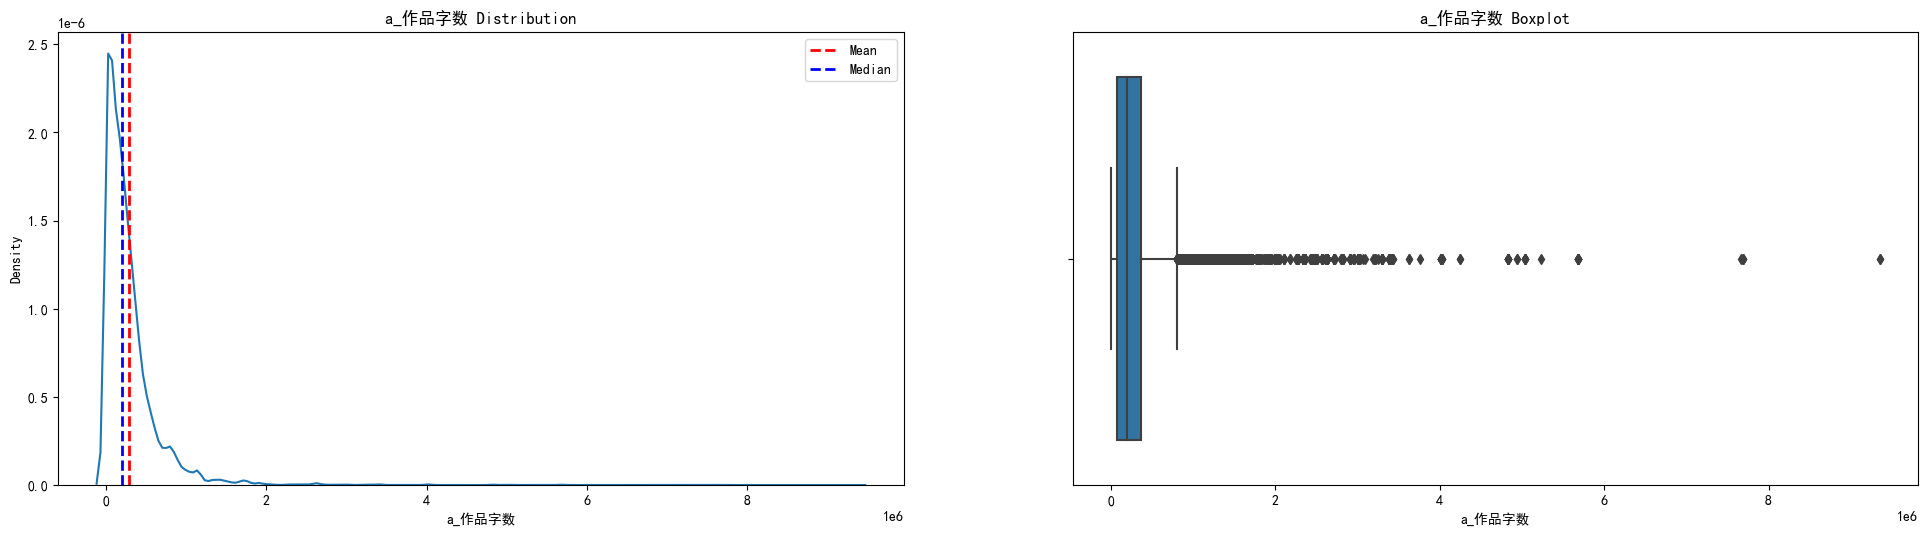

In [5]:
visualize_col('a_作品字数', data)

a_作者所发送红包数

a_作者所发送红包数
------------------------------
Mean: 6239.215 - Median: 97.000 - Std: 22348.644
Min: 0.000 - 25%: 0.000 - 50%: 97.000
75%: 1722.000 - Max: 392545.000 - Skew: 7.161
Missing Values: 1116/61548 (1.813%)


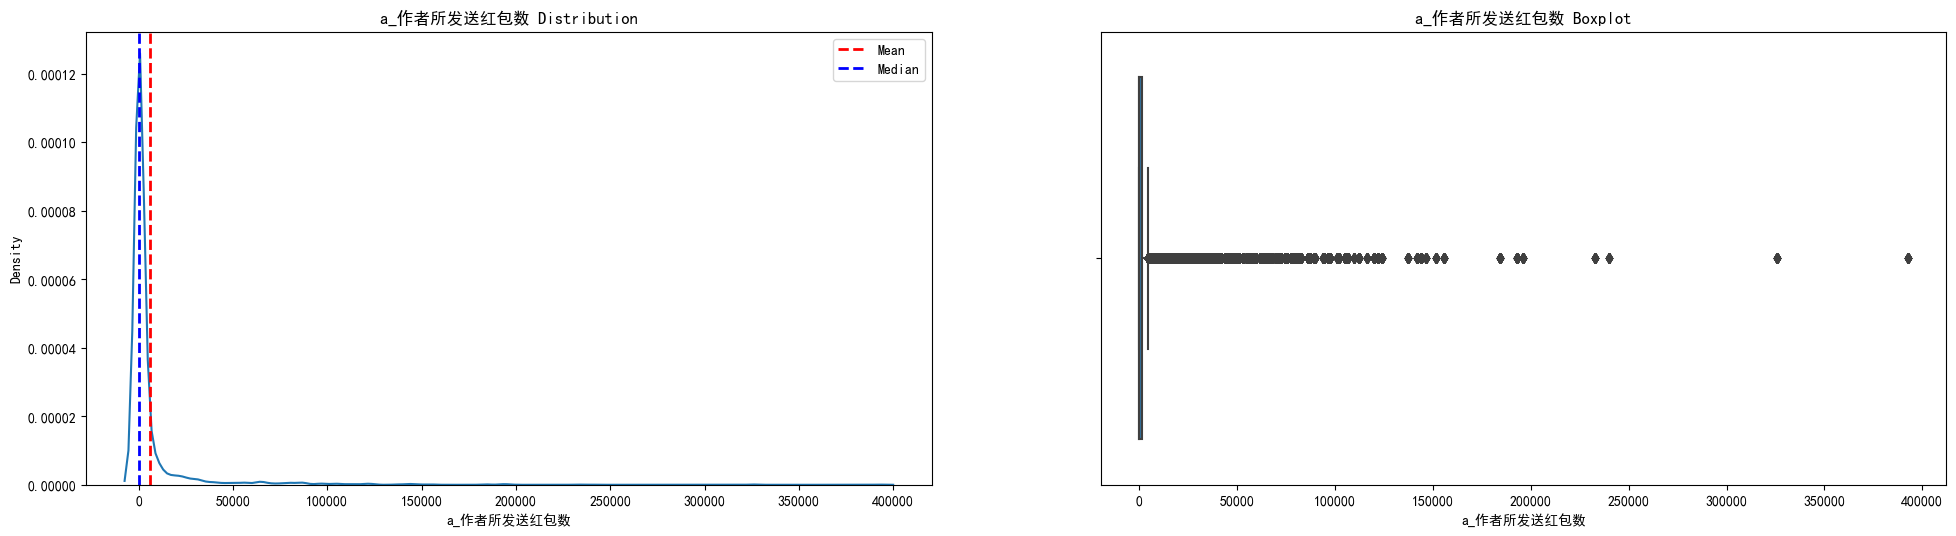

In [6]:
visualize_col('a_作者所发送红包数', data)

小说完本数

a_小说完本数
------------------------------
Mean: 14.084 - Median: 10.000 - Std: 14.779
Min: 0.000 - 25%: 4.000 - 50%: 10.000
75%: 19.000 - Max: 166.000 - Skew: 2.431
Missing Values: 1116/61548 (1.813%)


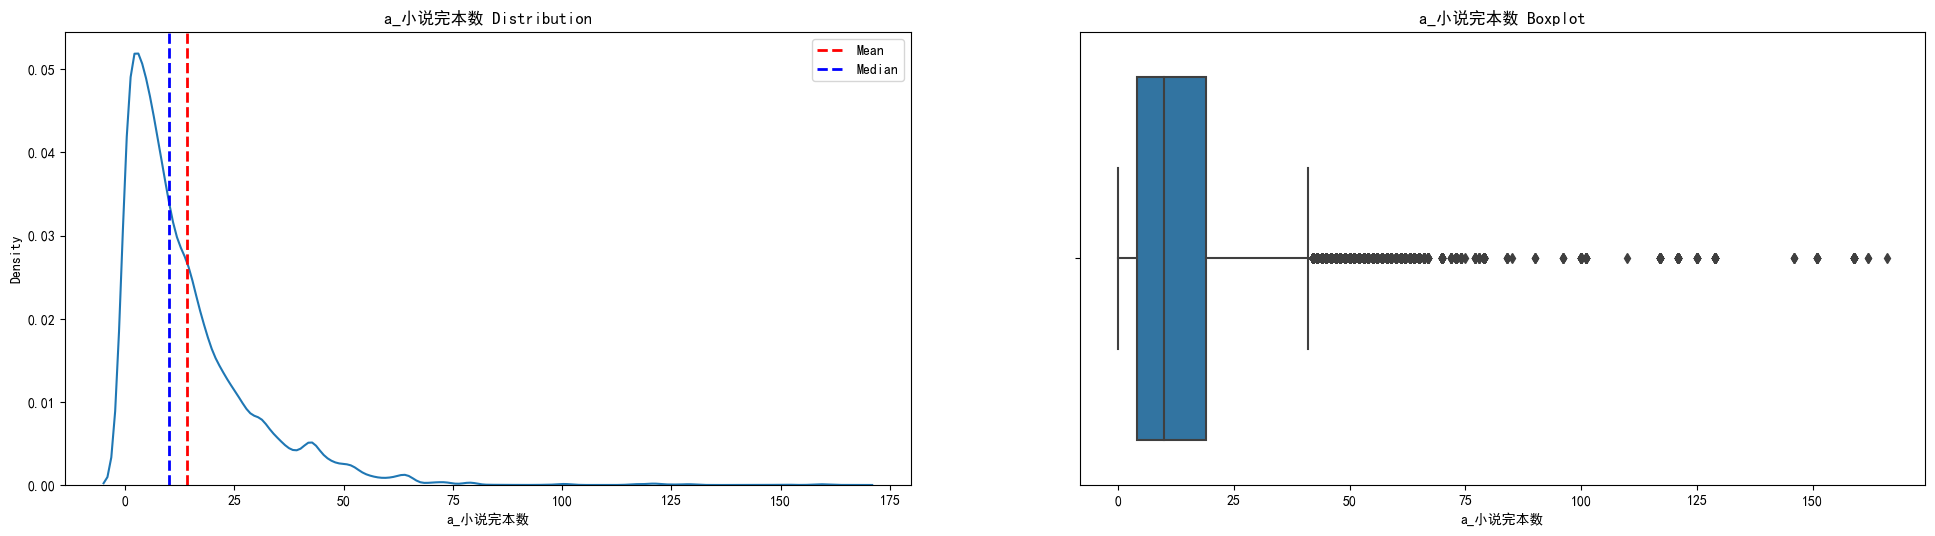

In [7]:
visualize_col('a_小说完本数', data)

小说连载数

a_小说连载数
------------------------------
Mean: 7.089 - Median: 5.000 - Std: 8.495
Min: 0.000 - 25%: 3.000 - 50%: 5.000
75%: 9.000 - Max: 177.000 - Skew: 8.298
Missing Values: 1116/61548 (1.813%)


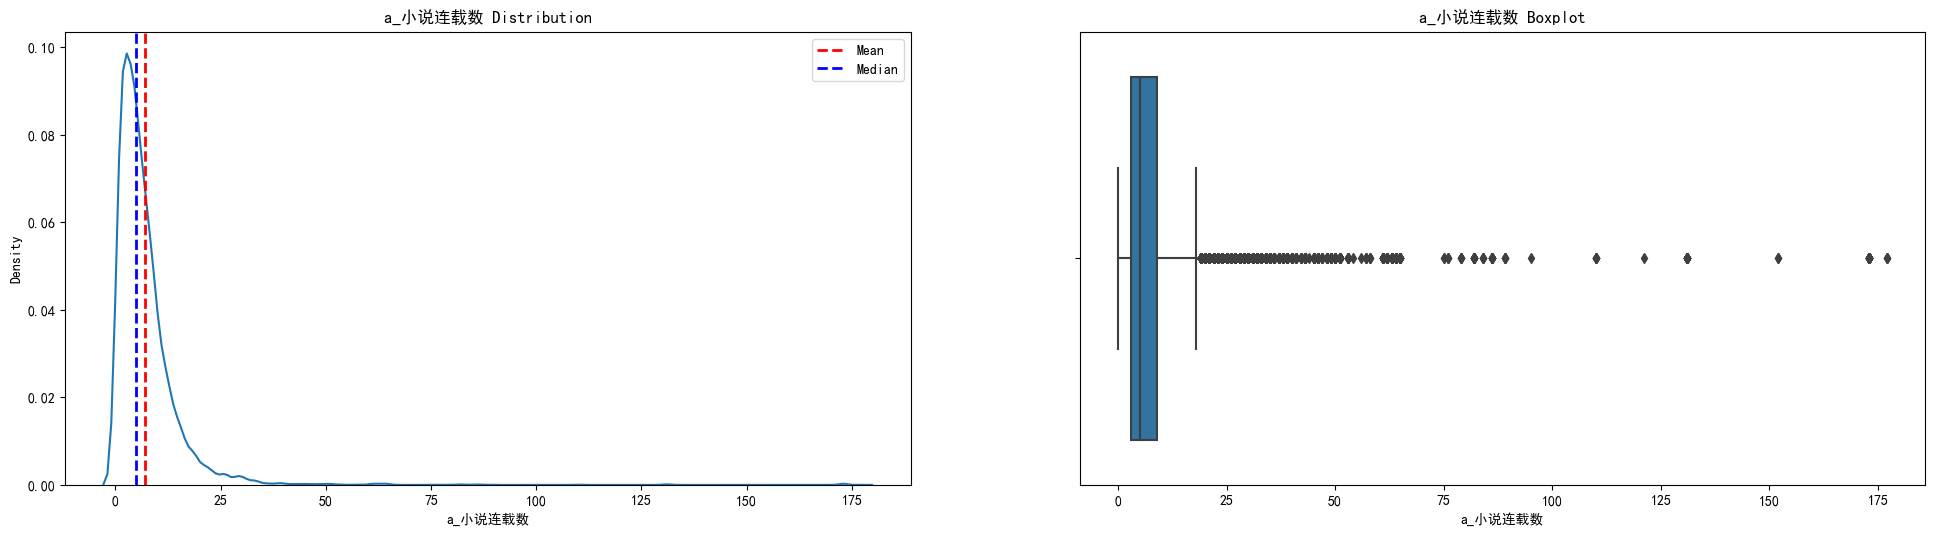

In [8]:
visualize_col('a_小说连载数', data)

小说连载数

a_小说连载数
------------------------------
Mean: 7.089 - Median: 5.000 - Std: 8.495
Min: 0.000 - 25%: 3.000 - 50%: 5.000
75%: 9.000 - Max: 177.000 - Skew: 8.298
Missing Values: 1116/61548 (1.813%)


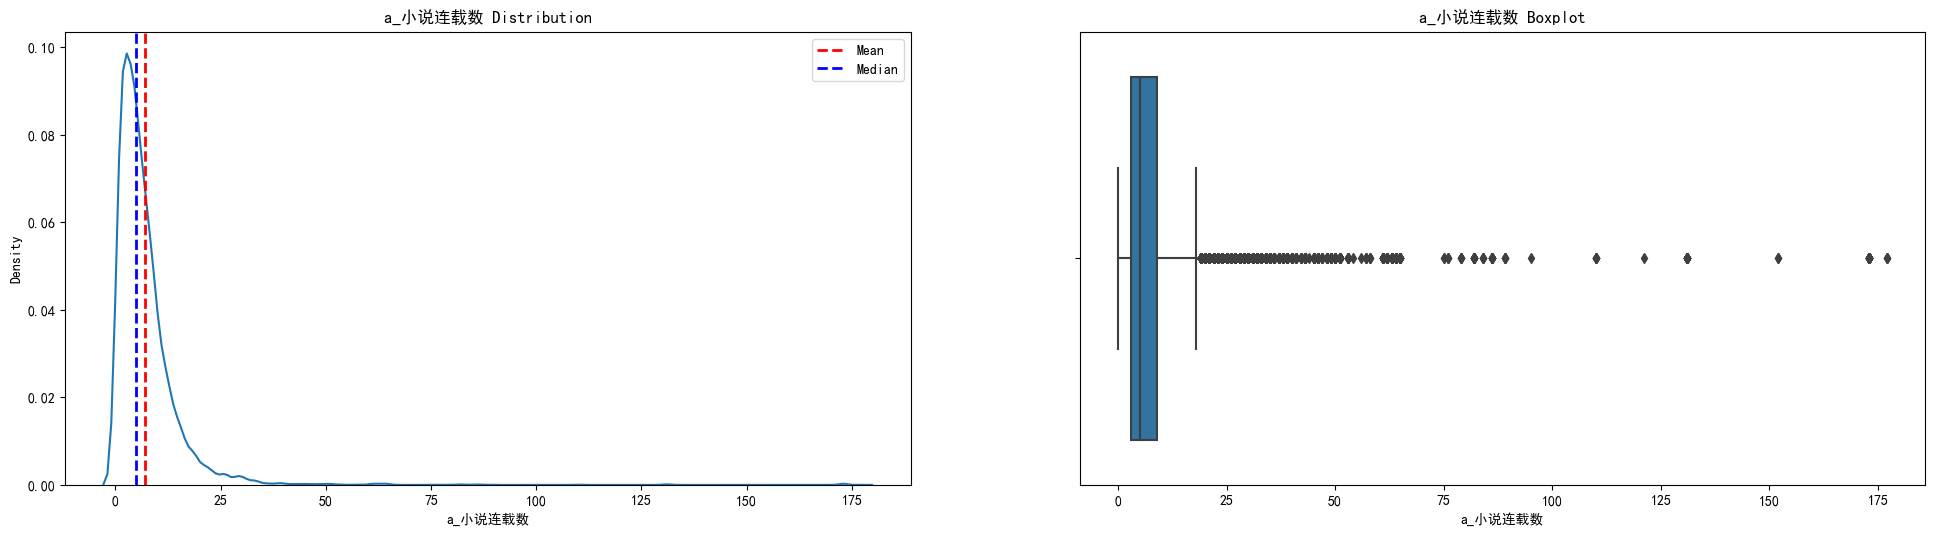

In [9]:
visualize_col('a_小说连载数', data)

被收藏数

a_被收藏数
------------------------------
Mean: 21737.949 - Median: 1771.000 - Std: 83755.269
Min: 0.000 - 25%: 210.000 - 50%: 1771.000
75%: 10010.000 - Max: 1152377.000 - Skew: 8.960
Missing Values: 1116/61548 (1.813%)


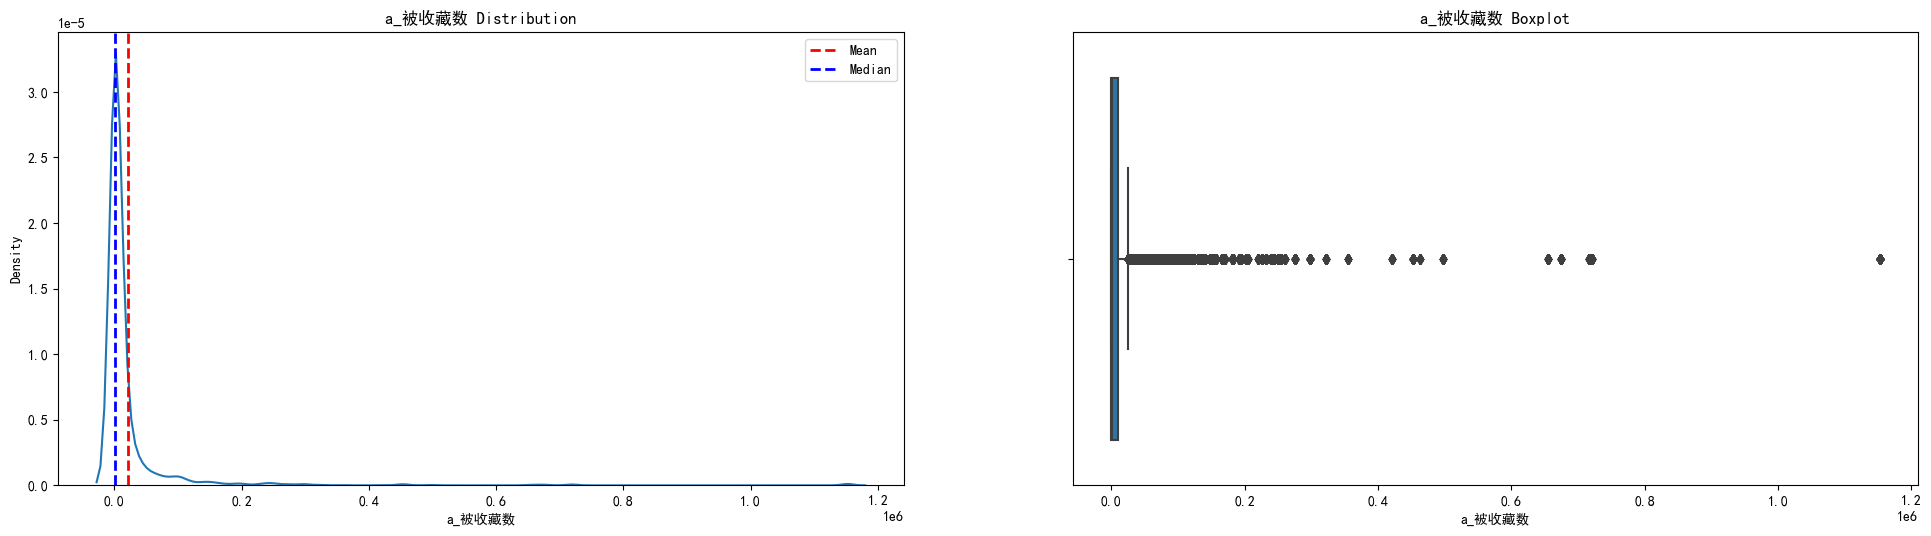

In [10]:
visualize_col('a_被收藏数', data)

全文字数

b_全文字数
------------------------------
Mean: 351019.303 - Median: 263951.000 - Std: 348471.572
Min: 10019.000 - 25%: 153065.000 - 50%: 263951.000
75%: 435401.000 - Max: 9357412.000 - Skew: 5.084
Missing Values: 443/61548 (0.720%)


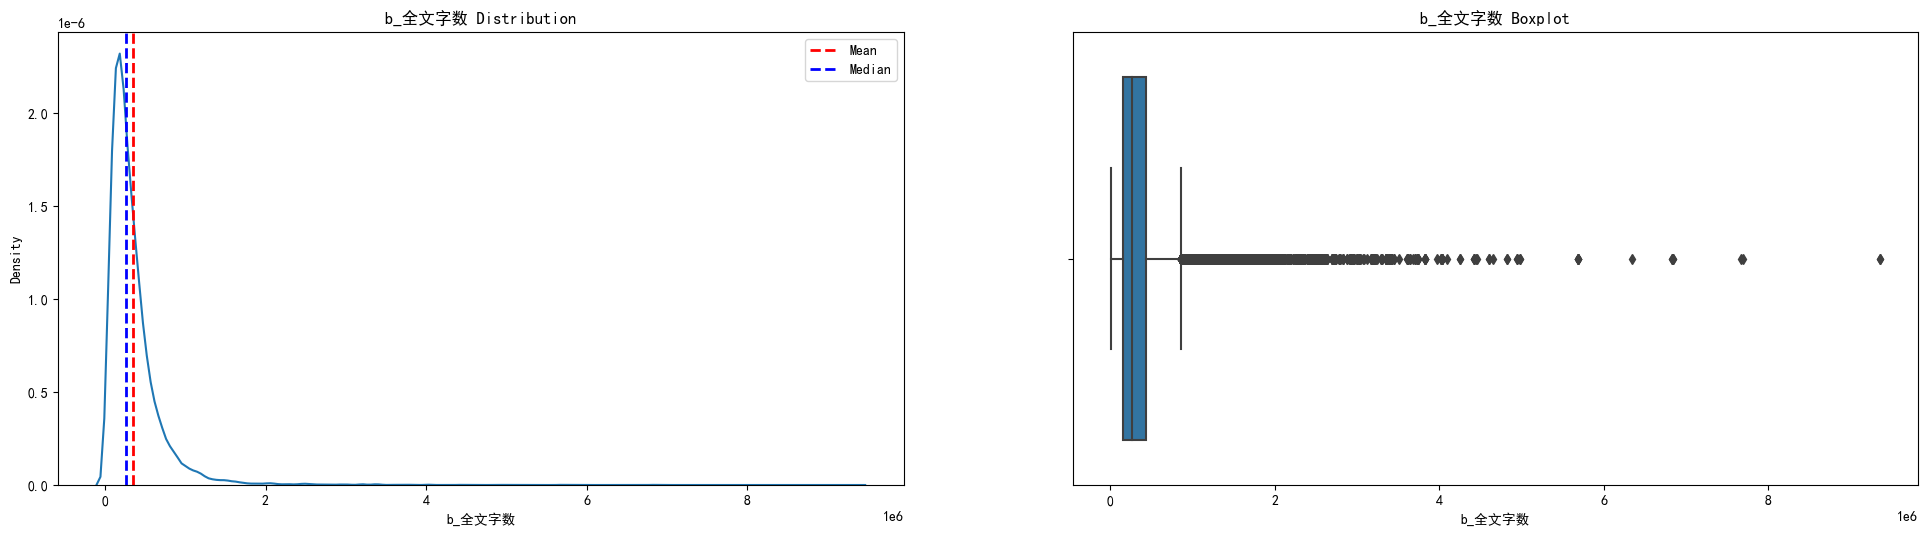

In [11]:
visualize_col('b_全文字数', data)

总书评数

b_总书评数
------------------------------
Mean: 9806.344 - Median: 1793.000 - Std: 34960.040
Min: 0.000 - 25%: 475.000 - 50%: 1793.000
75%: 6792.000 - Max: 915060.000 - Skew: 12.181
Missing Values: 443/61548 (0.720%)


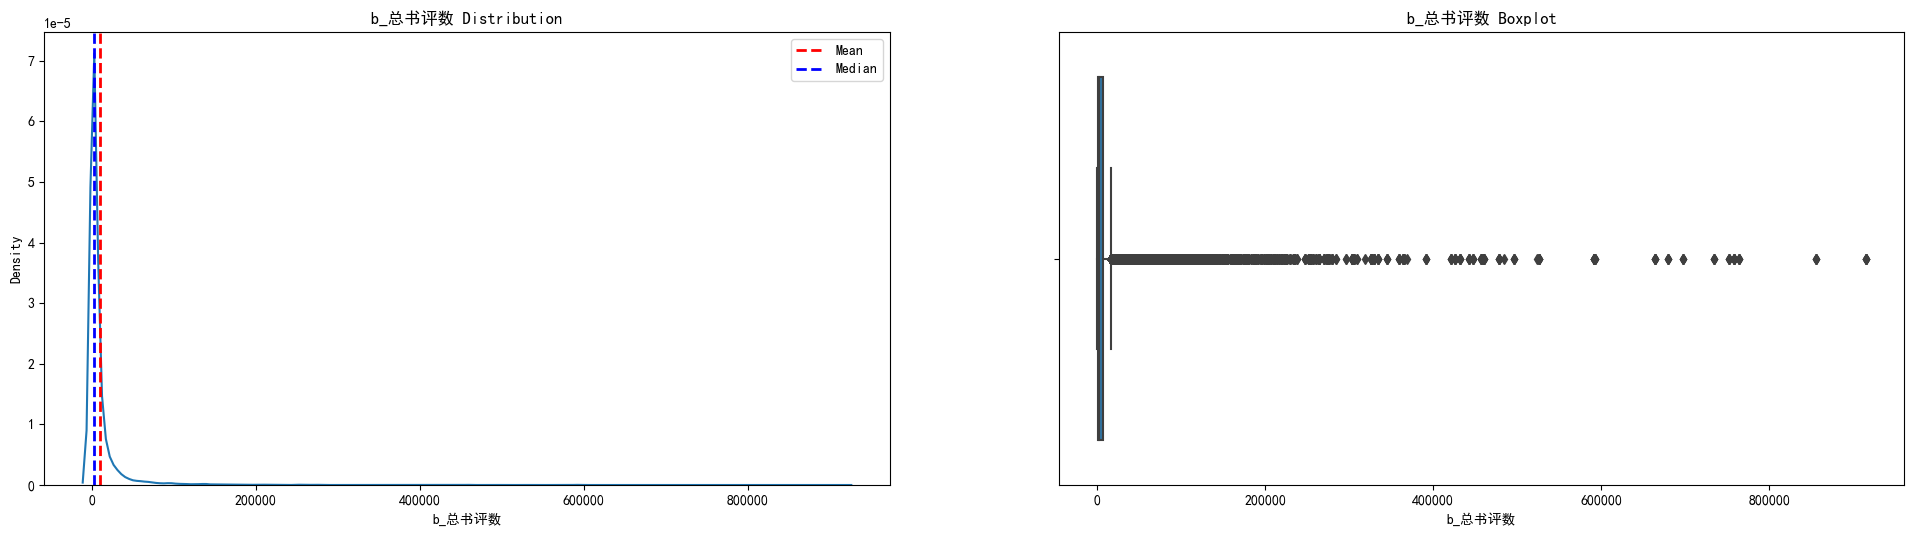

In [12]:
visualize_col('b_总书评数', data)

总点击量

b_总点击量
------------------------------
Mean: 1714881.473 - Median: 849002.000 - Std: 4869257.368
Min: 3.000 - 25%: 274774.000 - 50%: 849002.000
75%: 1903923.000 - Max: 360627595.000 - Skew: 37.432
Missing Values: 443/61548 (0.720%)


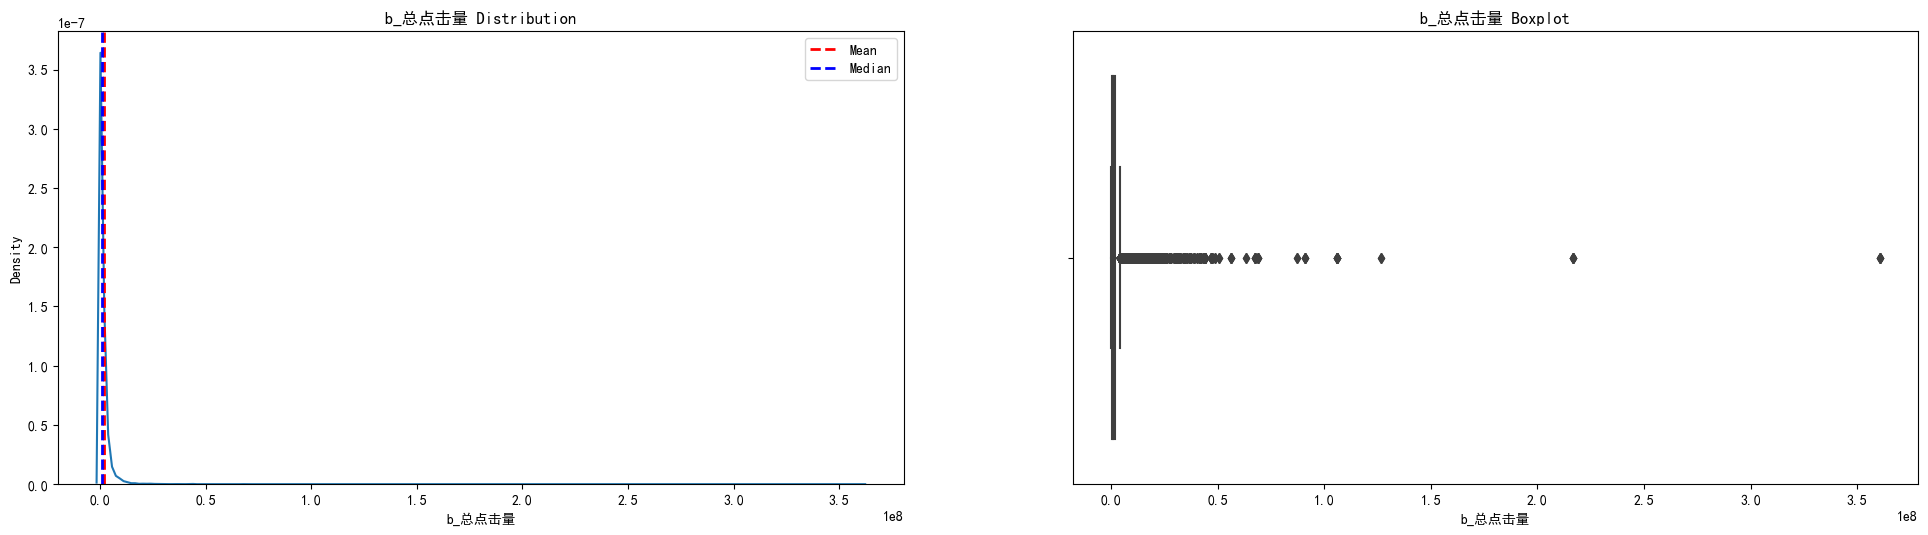

In [13]:
visualize_col('b_总点击量', data)

文章当前被收藏数

b_文章当前被收藏数
------------------------------
Mean: 20970.540 - Median: 5050.000 - Std: 58554.994
Min: 1.000 - 25%: 1654.000 - 50%: 5050.000
75%: 20074.000 - Max: 1443357.000 - Skew: 10.443
Missing Values: 443/61548 (0.720%)


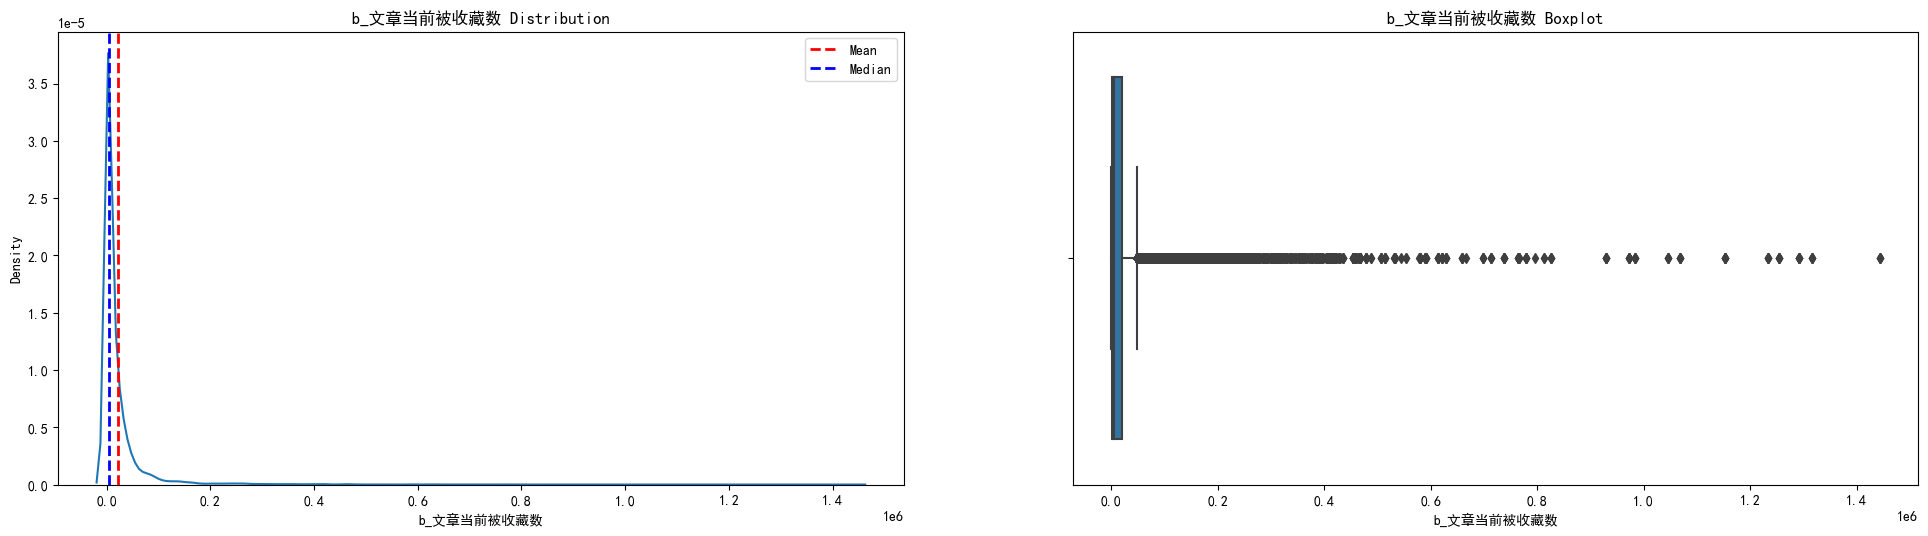

In [14]:
visualize_col('b_文章当前被收藏数', data)

文章积分

b_文章积分
------------------------------
Mean: 415002475.166 - Median: 66480960.000 - Std: 1317129283.310
Min: -1634660736.000 - 25%: 17463248.000 - 50%: 66480960.000
75%: 313206112.000 - Max: 32379904000.000 - Skew: 10.594
Missing Values: 443/61548 (0.720%)


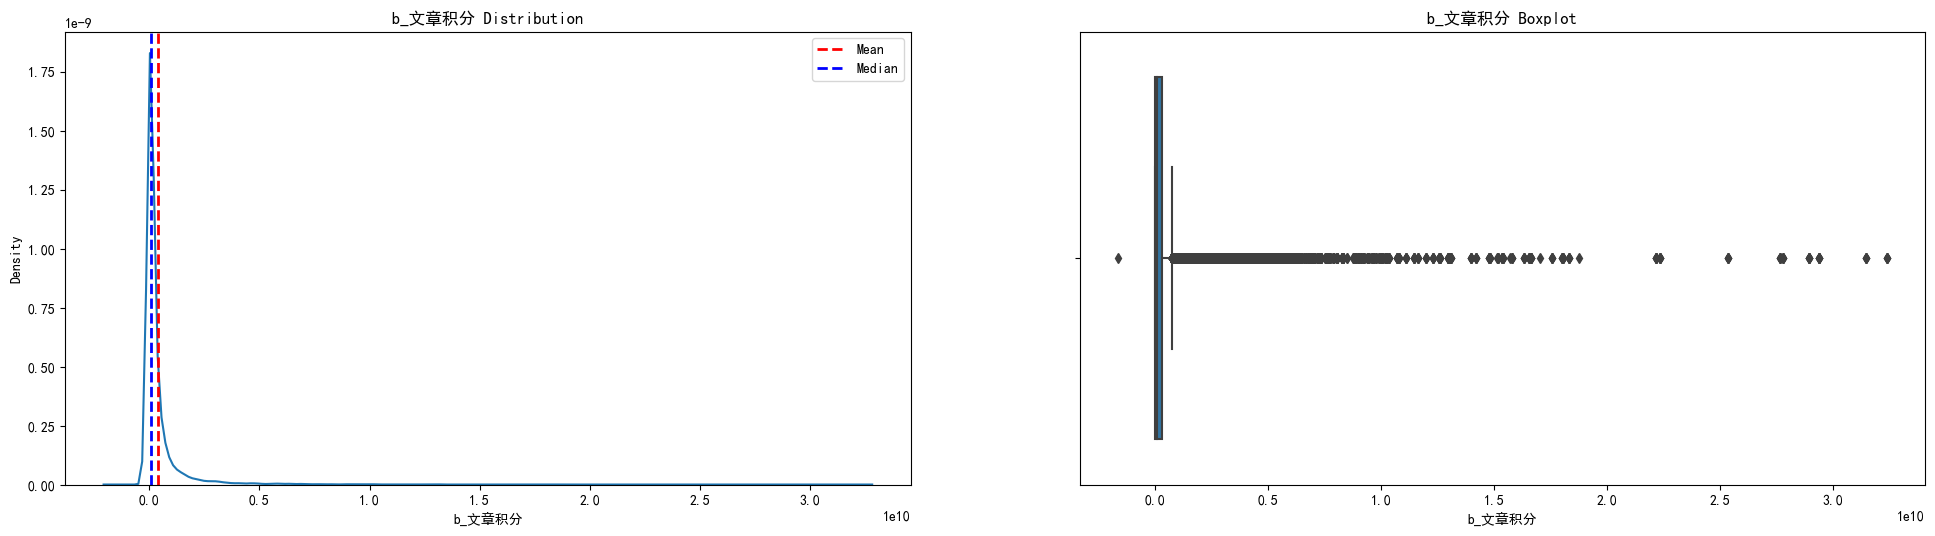

In [15]:
visualize_col('b_文章积分', data)

营养液数

b_营养液数
------------------------------
Mean: 20325.316 - Median: 988.000 - Std: 104038.510
Min: 0.000 - 25%: 132.000 - 50%: 988.000
75%: 8253.000 - Max: 4251863.000 - Skew: 16.307
Missing Values: 443/61548 (0.720%)


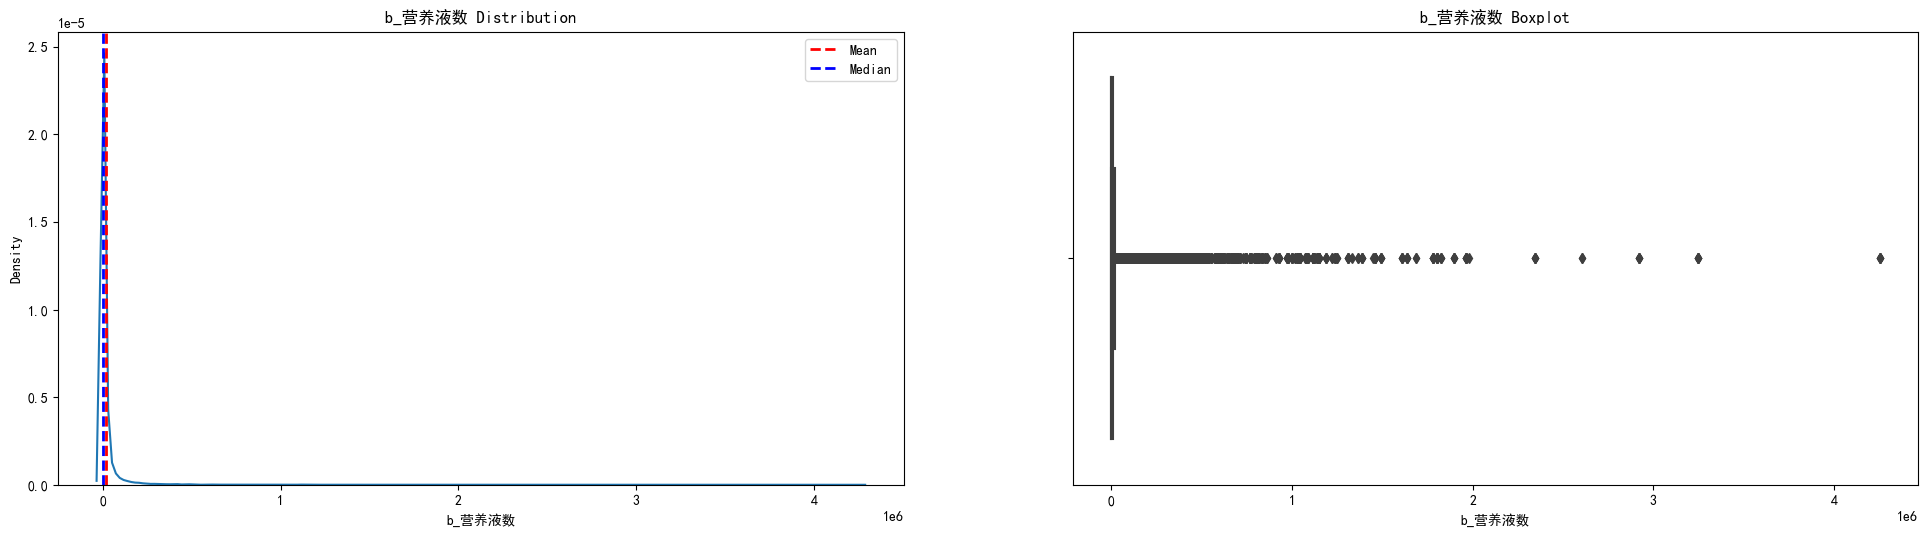

In [16]:
visualize_col('b_营养液数', data)

a_作品状态

<AxesSubplot:xlabel='a_作品状态', ylabel='count'>

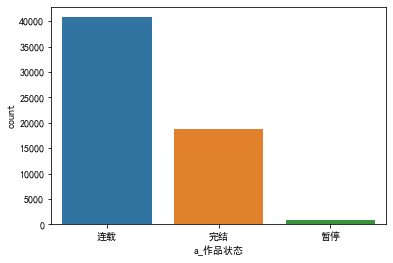

In [17]:
sns.countplot(x='a_作品状态', data=data)

a_最后更新时间

In [19]:
data['a_最后更新时间'] = pd.to_datetime(data['a_最后更新时间'])
print(f"最早的时间为 {data['a_最后更新时间'].min()}, 最近的时间为 {data['a_最后更新时间'].max()}, 出现时间最多的是{data['a_最后更新时间'].value_counts().index[0]}")

最早的时间为 2003-07-31 19:05:00, 最近的时间为 2022-03-13 23:18:32, 出现时间最多的是2022-03-13 18:00:00


b_作品视角

<AxesSubplot:xlabel='b_作品视角', ylabel='count'>

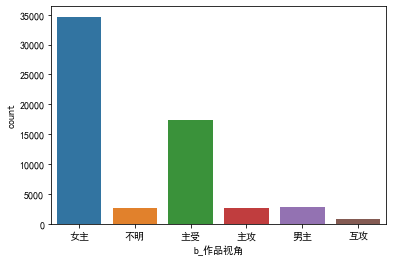

In [20]:
sns.countplot(x='b_作品视角', data=data)

b_作品风格

<AxesSubplot:xlabel='b_作品风格', ylabel='count'>

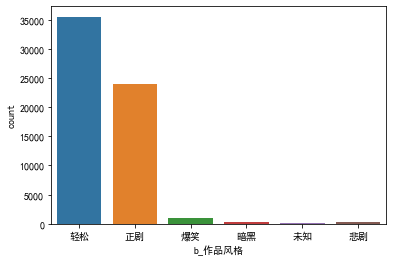

In [21]:
sns.countplot(x='b_作品风格', data=data)

b_文章进度

<AxesSubplot:xlabel='b_文章进度', ylabel='count'>

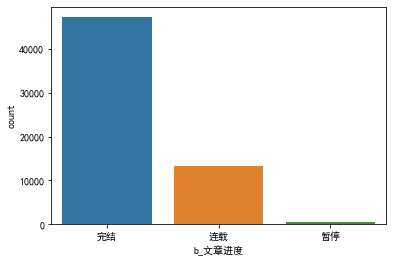

In [22]:
sns.countplot(x='b_文章进度', data=data)

b_签约状态

<AxesSubplot:xlabel='b_签约状态', ylabel='count'>

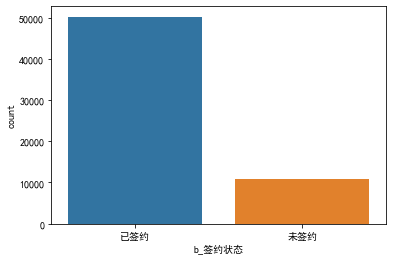

In [23]:
sns.countplot(x='b_签约状态', data=data)